In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# libreria para la eliminiacion de stop words
!pip install pandas nltk

In [ ]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de la data

In [ ]:
#data_bronce = pd.read_csv('/content/drive/MyDrive/Proyecto MediSyncMatch Monografia/Data/DataBronce/Data.csv')
data_bronce = pd.read_csv('/content/drive/MyDrive/Proyecto MediSyncMatch Monografia/Data/DataBronce/DataV2-1.csv')

# Analisis exploratorio

In [ ]:
# Numero de registros
data_bronce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CodigoInterno         5798 non-null   object
 1   NombreInvima          5790 non-null   object
 2   DescripcionComercial  5790 non-null   object
 3   PrincipioActivo       5790 non-null   object
 4   CodigoInvima          5790 non-null   object
 5   Cum                   5790 non-null   object
dtypes: object(6)
memory usage: 271.9+ KB


In [ ]:
data_bronce.shape

(5798, 6)

## Nulos

In [ ]:
#Nulos ?
print("Valores nulos por columna:")
print(data_bronce.isna().sum())

Valores nulos por columna:
CodigoInterno           0
NombreInvima            8
DescripcionComercial    8
PrincipioActivo         8
CodigoInvima            8
Cum                     8
dtype: int64


In [ ]:
data_bronce[
    (data_bronce["NombreInvima"].isna()) |
    (data_bronce["DescripcionComercial"].isna()) |
    (data_bronce["CodigoInvima"].isna()) |
    (data_bronce["Cum"].isna())]

CodigoInterno NombreInvima DescripcionComercial PrincipioActivo  \
384      C625200*B          NaN                  NaN             NaN   
423        C100025          NaN                  NaN             NaN   
474      C625201*B          NaN                  NaN             NaN   
1460       TAR0001          NaN                  NaN             NaN   
1938     C625002*B          NaN                  NaN             NaN   
2175       TAR0003          NaN                  NaN             NaN   
2861         VTINV          NaN                  NaN             NaN   
2862       TAR0002          NaN                  NaN             NaN   

     CodigoInvima  Cum  
384           NaN  NaN  
423           NaN  NaN  
474           NaN  NaN  
1460          NaN  NaN  
1938          NaN  NaN  
2175          NaN  NaN  
2861          NaN  NaN  
2862          NaN  NaN

In [ ]:
# Eliminacion de los nulos: Estos se eliminan debido a que nunguna de las referencias deberian de tener un valor CUM en NULL
# Eliminar filas donde Cum es NaN
data_bronce = data_bronce.dropna(subset=["Cum"])

## Duplicados

In [ ]:
print("\n¿CodigoInterno es único?", data_bronce["CodigoInterno"].is_unique)
print("Duplicados en Cum:", data_bronce["Cum"].duplicated().sum())
print("Duplicados en CodigoInvima:", data_bronce["CodigoInvima"].duplicated().sum())
print("Duplicados en DescripcionComercial:", data_bronce["DescripcionComercial"].duplicated().sum())


¿CodigoInterno es único? False
Duplicados en Cum: 1492
Duplicados en CodigoInvima: 1847
Duplicados en DescripcionComercial: 1608


##Transformaciones sobre la data

### Eliminacion de caracteres especiales
### Transformnación de caracteres a Mayusculas

In [ ]:
data_bronce["NombreInvima_limpio"] = (
    data_bronce["NombreInvima"]
    .str.upper()
    .str.replace(r"[^A-ZÁÉÍÓÚÜÑ0-9\s]", "", regex=True)
)

data_bronce["DescripcionComercial_limpio"] = (
    data_bronce["DescripcionComercial"]
    .str.upper()
    .str.replace(r"[^A-ZÁÉÍÓÚÜÑ0-9\s]", "", regex=True)
)

data_bronce = data_bronce.drop(["NombreInvima", "DescripcionComercial"], axis=1)


In [ ]:
#TODO: Identificando de que los codigos de todos los medicamentos sean codigos unicos
duplicados = data_bronce[data_bronce['CodigoInterno'].duplicated(keep=False)]
duplicados


CodigoInterno                                    PrincipioActivo  \
1          C670304                               OLMESARTAN MEDOXOMIL   
2          C150380  BETAMETASONA SODIO FOSFATO 3.95 MGEQUIVALENTE ...   
6          C022020  TRIFENATATO DE VILANTEROL MICRONIZADO 40 MCG E...   
9          C055670                                     LEVONORGESTREL   
13         C901597                                       DEXAMETASONA   
...            ...                                                ...   
5784       C105230                                    CAFEINA ANHIDRA   
5785        215480                              ANTIPIRINA (FENAZONA)   
5789          5321                                  SEVOFLURANO 100 %   
5790       C190806                                         INDAPAMIDA   
5796        C13050                                       ACETAMINOFEN   

                 CodigoInvima         Cum  \
1        INVIMA 2013M-0014448  20052048-3   
2     INVIMA 2021M-0009967-R1  20009479-3   
6        INVIMA 2019M-0019227  20156998-1   
9      INVIMA 2019M-003819-R4     38692-1   
13     INVIMA 2009M-012121-R1    230345-1   
...                       ...         ...   
5784  INVIMA 2020M-0015848-R1  20068196-4   
5785   INVIMA 2022M-010269-R3    225311-1   
5789   INVIMA 2020M-014996-R3     58816-2   
5790  INVIMA 2023M-0018124-R1  20100603-3   
5796  INVIMA 2019M-0000816-R2  19925329-4   

                                    NombreInvima_limpio  \
1             ILTUXAM  40 MG  5 MG TABLETAS RECUBIERTAS   
2                         INFLACORRETARDINYECTABLE 1 ML   
6     TRELEGY ELLIPTA 100MCG625MCG25MCG POLVO PARA I...   
9                                             NEOGYNON    
13                                      TRAZIDEX OFTENO   
...                                                 ...   
5784                                    IBUFLASH MIGRAN   
5785                            OTIRILIN SOLUCIÓN ÓTICA   
5789                                           SEVORANE   
5790                                    CARDIKIN 160125   
5796                                  ZALDIAR  TABLETAS   

                            DescripcionComercial_limpio  
1     CAJA POR 28 TABLETAS RECUBIERTAS COMPRIMIDOS E...  
2     CAJA POR 100 AMPOLLAS DE VIDRIO TIPO I INCOLOR...  
6     2B1030411000100 CAJA CON UN INHALADOR ORAL CON...  
9     CAJA PLEGADIZA BLISTER PVC ALUMINIO POR 21 GRA...  
13    CAJA DE CARTON CON 1 FRASCO GOTERO DE POLIETIL...  
...                                                 ...  
5784  CAJA PLEGADIZA POR 8 CÁPSULAS BLANDAS EN BLIST...  
5785  CAJA CON UN FRASCO DE VIDRIO DE 15 ML AMBAR TI...  
5789  FRASCO POR 250 ML EN POLIETILEN NAFTALATO ÁMBA...  
5790  CAJA X 30 TABLETAS RECUBIERTAS EN BLISTER PVCP...  
5796  CAJA POR 20 TABLETAS EN BLISTER DE PVCPEPVDCAL...  

[2179 rows x 6 columns]

In [ ]:
#le asignare una variasion a los codigos internos de estos medicamentos asignandoles '-1' o '-2' con tal d3e identificarlos como valores unicos
data_bronce.loc[
    (data_bronce['Cum'] == '20043928-1') & (data_bronce['CodigoInterno'] == '500722'),
    'CodigoInterno'
] = '500722-1'

In [ ]:
data_bronce.loc[
    (data_bronce['Cum'] == '35578-2') & (data_bronce['CodigoInterno'] == '5321'),
    'CodigoInterno'
] = '5321-1'

In [ ]:
duplicados = data_bronce[data_bronce['CodigoInterno'].duplicated(keep=False)]
duplicados

CodigoInterno                                    PrincipioActivo  \
1          C670304                               OLMESARTAN MEDOXOMIL   
2          C150380  BETAMETASONA SODIO FOSFATO 3.95 MGEQUIVALENTE ...   
6          C022020  TRIFENATATO DE VILANTEROL MICRONIZADO 40 MCG E...   
9          C055670                                     LEVONORGESTREL   
13         C901597                                       DEXAMETASONA   
...            ...                                                ...   
5779       C153425                      TENOFOVIR DISOPROXIL FUMARATO   
5784       C105230                                    CAFEINA ANHIDRA   
5785        215480                              ANTIPIRINA (FENAZONA)   
5790       C190806                                         INDAPAMIDA   
5796        C13050                                       ACETAMINOFEN   

                 CodigoInvima         Cum  \
1        INVIMA 2013M-0014448  20052048-3   
2     INVIMA 2021M-0009967-R1  20009479-3   
6        INVIMA 2019M-0019227  20156998-1   
9      INVIMA 2019M-003819-R4     38692-1   
13     INVIMA 2009M-012121-R1    230345-1   
...                       ...         ...   
5779  INVIMA 2020M-0013048-R1  20043884-1   
5784  INVIMA 2020M-0015848-R1  20068196-4   
5785   INVIMA 2022M-010269-R3    225311-1   
5790  INVIMA 2023M-0018124-R1  20100603-3   
5796  INVIMA 2019M-0000816-R2  19925329-4   

                                    NombreInvima_limpio  \
1             ILTUXAM  40 MG  5 MG TABLETAS RECUBIERTAS   
2                         INFLACORRETARDINYECTABLE 1 ML   
6     TRELEGY ELLIPTA 100MCG625MCG25MCG POLVO PARA I...   
9                                             NEOGYNON    
13                                      TRAZIDEX OFTENO   
...                                                 ...   
5779  EMTRICITABINA 200 MG Y TENOFOVIR DISOPROXIL FU...   
5784                                    IBUFLASH MIGRAN   
5785                            OTIRILIN SOLUCIÓN ÓTICA   
5790                                    CARDIKIN 160125   
5796                                  ZALDIAR  TABLETAS   

                            DescripcionComercial_limpio  
1     CAJA POR 28 TABLETAS RECUBIERTAS COMPRIMIDOS E...  
2     CAJA POR 100 AMPOLLAS DE VIDRIO TIPO I INCOLOR...  
6     2B1030411000100 CAJA CON UN INHALADOR ORAL CON...  
9     CAJA PLEGADIZA BLISTER PVC ALUMINIO POR 21 GRA...  
13    CAJA DE CARTON CON 1 FRASCO GOTERO DE POLIETIL...  
...                                                 ...  
5779  CAJA CON FRASCO DE HDPE CON 30 TABLETAS RECUBI...  
5784  CAJA PLEGADIZA POR 8 CÁPSULAS BLANDAS EN BLIST...  
5785  CAJA CON UN FRASCO DE VIDRIO DE 15 ML AMBAR TI...  
5790  CAJA X 30 TABLETAS RECUBIERTAS EN BLISTER PVCP...  
5796  CAJA POR 20 TABLETAS EN BLISTER DE PVCPEPVDCAL...  

[2175 rows x 6 columns]

In [ ]:
data_bronce.shape

(5790, 6)

### Exploracion semántica

In [ ]:
from collections import Counter
import re

def tokens(text):
    return re.findall(r"\b\w+\b", str(text).lower())


In [ ]:
all_tokens_DescripcionComercial = [t for desc in data_bronce["DescripcionComercial_limpio"] for t in tokens(desc)]
#Counter(all_tokens_DescripcionComercial).most_common(20)

#### Graficando distribuciones de las palabras para las columnas NombreInvima y DescripcionComercial

In [ ]:

def graficar_distribuciones_de_palabras(all_tokens,nombre_columna):

  top_tokens = Counter(all_tokens).most_common(20)
  palabras, frecuencias = zip(*top_tokens)

  # Crear gráfico
  plt.figure(figsize=(12,6))
  plt.barh(palabras[::-1], frecuencias[::-1], color="steelblue")
  plt.xlabel("Frecuencia")
  plt.ylabel("Término")
  plt.title(f"Top 20 palabras más comunes en {nombre_columna}")
  plt.tight_layout()

  # Guardar en PNG
  plt.savefig(f"/content/drive/MyDrive/Proyecto MediSyncMatch Monografia/Figuras/distibucion_palabras_columna_{nombre_columna}.png", dpi=300)   # alta resolución

  # También puedes guardar en PDF, JPG, SVG, etc.
  # plt.savefig("top20_tokens.pdf")

  plt.show()


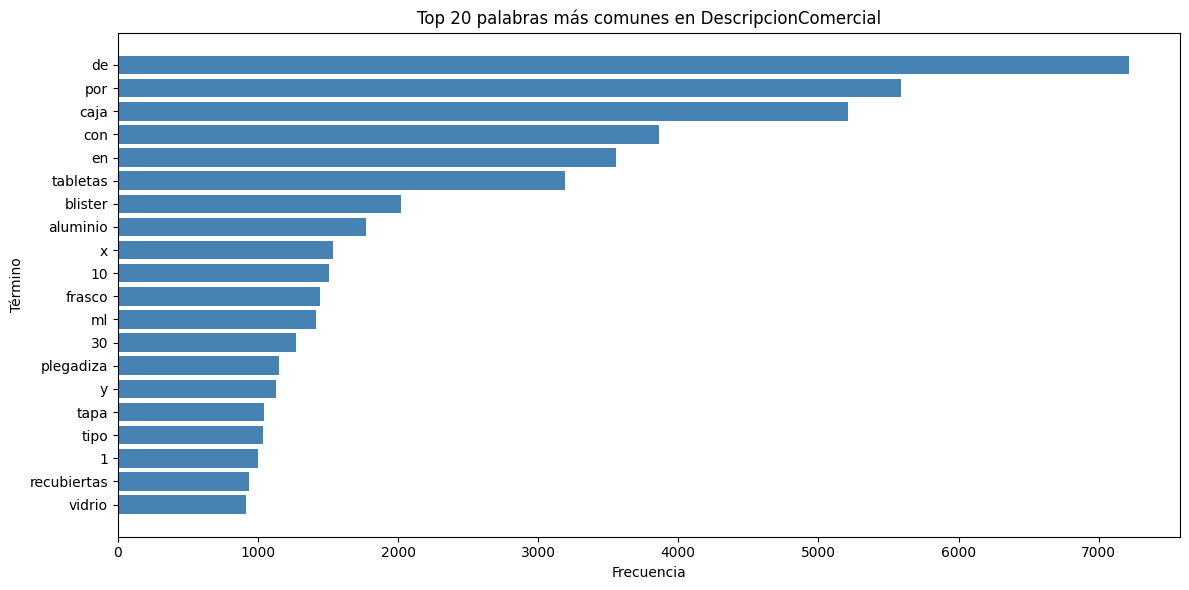

In [ ]:
graficar_distribuciones_de_palabras(all_tokens_DescripcionComercial,"DescripcionComercial")

In [ ]:
all_tokens_NombreInvima_limpio = [t for desc in data_bronce["NombreInvima_limpio"] for t in tokens(desc)]
#Counter(all_tokens_NombreInvima_limpio).most_common(20)

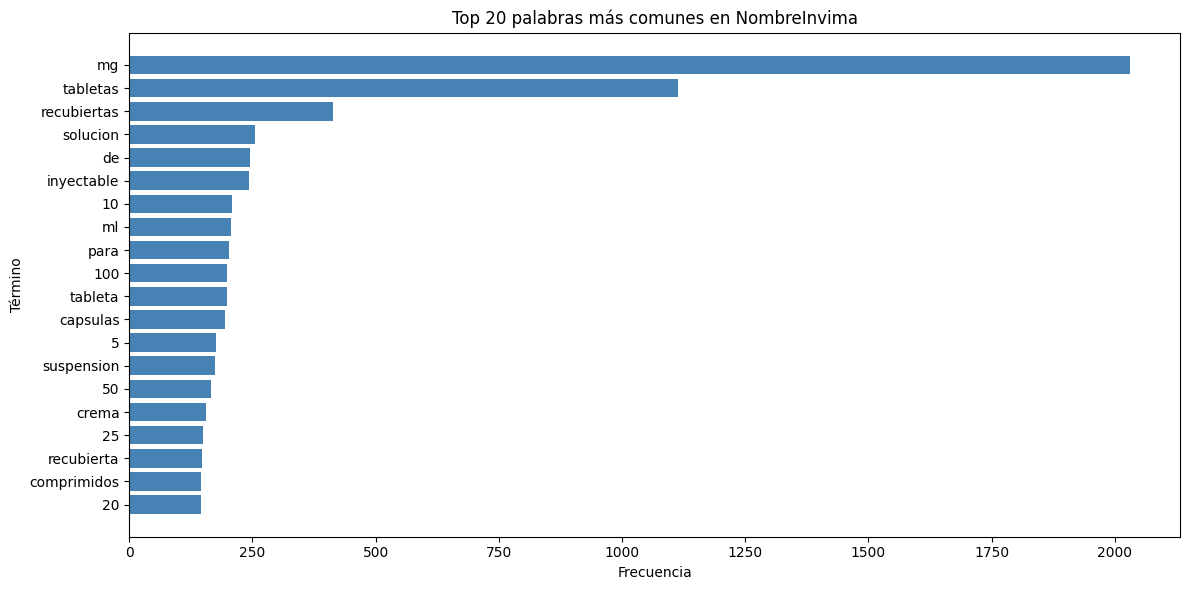

In [ ]:
graficar_distribuciones_de_palabras(all_tokens_NombreInvima_limpio,"NombreInvima")

## Eliminando las stop words y caracteres especiales, eliminarlos en las columnas que no sean Codigo interno

In [ ]:
# instanciando la variable de las stopwords en español
stop_words = set(stopwords.words("spanish"))

In [ ]:
def eliminador_stopwords(texto):
  if not isinstance(texto, str):  # si no es string, devolver vacío o el mismo valor
        return ""
  palabras = texto.lower().split()
  palabras_filtradas = [p for p in palabras if p not in stop_words]
  return " ".join(palabras_filtradas).upper()

In [ ]:
# data bronce despues de la eliminacion de las stop words
data_bronce_sin_stop_words = data_bronce.copy()
data_bronce_sin_stop_words['DescripcionComercial_limpio'] = data_bronce_sin_stop_words['DescripcionComercial_limpio'].apply(eliminador_stopwords)
data_bronce_sin_stop_words['NombreInvima_limpio'] = data_bronce_sin_stop_words['NombreInvima_limpio'].apply(eliminador_stopwords)

In [ ]:
all_tokens_NombreInvima_limpio = [t for desc in data_bronce_sin_stop_words["NombreInvima_limpio"] for t in tokens(desc)]
#Counter(all_tokens_NombreInvima_limpio).most_common(20)

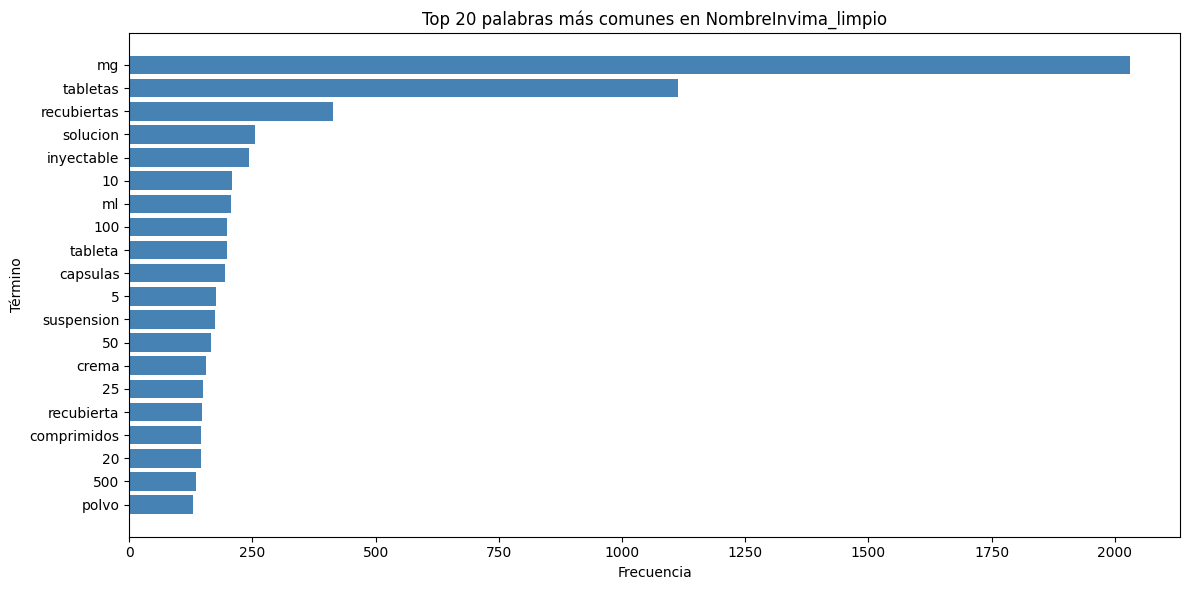

In [ ]:
graficar_distribuciones_de_palabras(all_tokens_NombreInvima_limpio,"NombreInvima_limpio")

In [ ]:
all_tokens_DescripcionComercial = [t for desc in data_bronce_sin_stop_words["DescripcionComercial_limpio"] for t in tokens(desc)]
#Counter(all_tokens_DescripcionComercial).most_common(20)

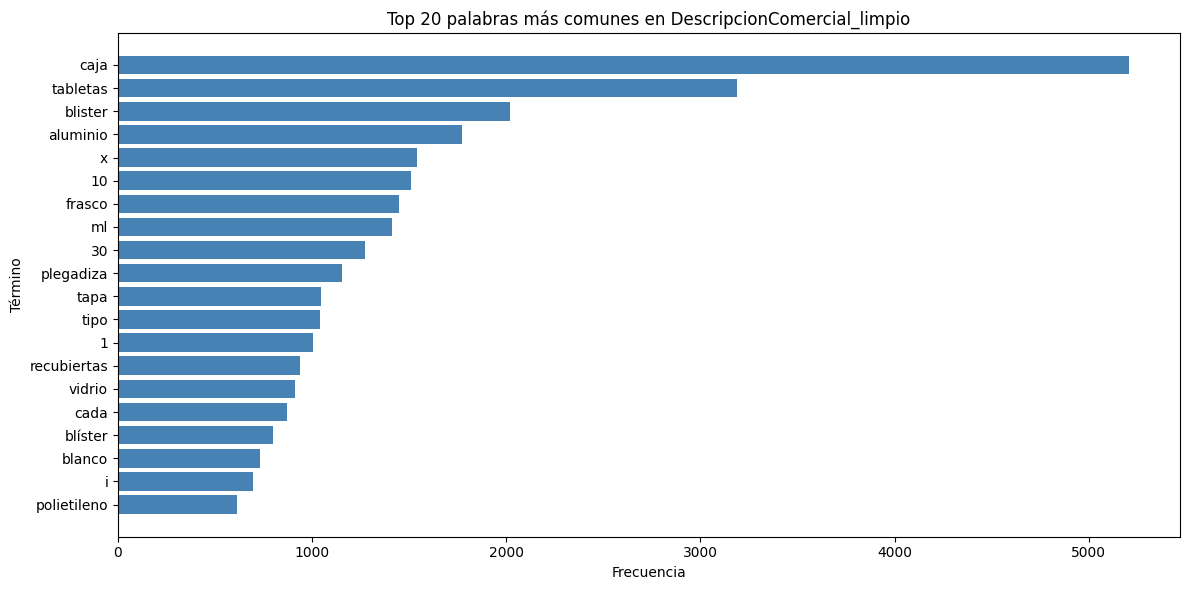

In [ ]:
#TODO: Graficar la exploracion semantica y guardar esta grafica
graficar_distribuciones_de_palabras(all_tokens_DescripcionComercial,"DescripcionComercial_limpio")

# Embedding


In [ ]:
!pip install -U google-generativeai
!pip install faiss-cpu
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 29.7 MB/s eta 0:00:00


In [ ]:
#PRUEBA 3
import os
import faiss
import pickle
import numpy as np
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import google.generativeai as genai
from google.colab import userdata

class Embedding:
    def __init__(self, secret_name: str = "GOOGLE_API_KEY"):
        """
        Inicializa el modelo de embeddings y el modelo LLM farmacéutico.
        """
        from sentence_transformers import SentenceTransformer
        self.embedding_model = SentenceTransformer('all-distilroberta-v1')
        self.index = faiss.IndexFlatL2(768)
        self.text_store = []
        self.embedding_store = []
        self.threshold = 0.85

        api_key = os.getenv(secret_name)
        try:
            if not api_key:
                api_key = userdata.get(secret_name)
        except Exception:
            pass
        if not api_key:
            raise ValueError("❌ No se encontró una clave API válida para Google Gemini.")

        genai.configure(api_key=api_key)
        self.llm_model = "gemini-2.0-flash-exp"

    def embedder(self, textos: List[str]) -> np.ndarray:
        embeddings = self.embedding_model.encode(textos, show_progress_bar=False)
        self.index.add(np.array(embeddings).astype('float32'))
        self.text_store.extend(textos)
        self.embedding_store.extend(embeddings)
        return embeddings

    def embed_single(self, texto: str) -> np.ndarray:
        return self.embedding_model.encode([texto])[0]

    def retrieval(self, query: str, k: int = 5):
        if not self.text_store:
            raise ValueError("El índice está vacío. Ejecuta `.embedder()` primero.")

        query_emb = self.embed_single(query)
        D, I = self.index.search(np.array([query_emb]).astype('float32'), k)

        resultados = []
        for idx, distancia in zip(I[0], D[0]):
            texto = self.text_store[idx]
            emb_candidato = self.embedding_store[idx]
            cos_sim = cosine_similarity([query_emb], [emb_candidato])[0][0]

            if cos_sim >= self.threshold:
                resultados.append({
                    "texto": texto,
                    "distancia_l2": float(distancia),
                    "similitud_coseno": float(cos_sim)
                })

        if not resultados:
            print(f"⚠️ Ningún resultado superó el umbral de similitud {self.threshold}.")
        return resultados

    def farmacéutico_llm(self, query: str, k: int = 5) -> dict:
        """
        Usa el modelo LLM (Gemini) para actuar como farmacéutico y recomendar el medicamento homólogo más adecuado.
        """
        top_k = self.retrieval(query, k=k)

        if not top_k:
            return {
                "texto_busqueda": query,
                "top_k": [],
                "respuesta_llm": "No se encontraron candidatos con similitud suficiente."
            }

        contexto = "\n".join([
            f"{i+1}. {item['texto']} (similitud: {item['similitud_coseno']:.3f})"
            for i, item in enumerate(top_k)
        ])

        prompt = f"""
        Eres un farmacéutico experto en homologación de medicamentos.
        Se te proporciona una descripción de búsqueda y una lista de medicamentos candidatos
        que superan un umbral de similitud semántica de {self.threshold}.
        Tu tarea es elegir el medicamento homólogo más adecuado y devolver solo su texto exacto.

        🔍 Texto de búsqueda:
        {query}

        💊 Candidatos filtrados:
        {contexto}

        Respuesta esperada:
        <solo el texto completo del medicamento seleccionado, sin comillas ni explicación>
        """

        model = genai.GenerativeModel(self.llm_model)
        respuesta = model.generate_content(prompt)

        return {
            "texto_busqueda": query,
            "top_k": top_k,
            "respuesta_llm": respuesta.text
        }

    def save_index(self, prefix: str = "embeddings_index"):
        faiss.write_index(self.index, f"{prefix}.faiss")
        with open(f"{prefix}.pkl", "wb") as f:
            pickle.dump({
                "text_store": self.text_store,
                "embedding_store": self.embedding_store
            }, f)
        print(f"Índice y datos guardados con prefijo '{prefix}'")

    def load_index(self, prefix: str = "embeddings_index"):
        self.index = faiss.read_index(f"{prefix}.faiss")
        with open(f"{prefix}.pkl", "rb") as f:
            data = pickle.load(f)
        self.text_store = data["text_store"]
        self.embedding_store = data["embedding_store"]
        print(f"Índice y datos cargados desde '{prefix}'")


In [ ]:
def concatenacion_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Crea una nueva columna 'texto_completo' que concatena la información
    de varias columnas del DataFrame en un solo texto descriptivo.

    Columnas consideradas:
    - CodigoInterno
    - NombreInvima_limpio
    - DescripcionComercial_limpio
    - CodigoInvima
    - Cum

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con las columnas mencionadas.

    Retorna
    -------
    pd.DataFrame
        Mismo DataFrame con una nueva columna 'texto_completo'.

    Lanza
    -----
    KeyError
        Si falta alguna de las columnas requeridas.
    """

    columnas_requeridas = [
        "CodigoInterno",
        "NombreInvima_limpio",
        "DescripcionComercial_limpio",
        "CodigoInvima",
        "Cum",
    ]

    # Validar existencia de columnas
    faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if faltantes:
        raise KeyError(f"Faltan columnas en el DataFrame: {faltantes}")

    # Concatenar valores tal como estén (si hay NaN, quedarán como 'nan')
    df["texto_completo"] = (
        "Codigo Interno: " + df["CodigoInterno"].astype(str)
        + " | Nombre Invima: " + df["NombreInvima_limpio"].astype(str)
        + " | Descripcion Comercial: " + df["DescripcionComercial_limpio"].astype(str)
        + " | Codigo Invima: " + df["CodigoInvima"].astype(str)
        + " | CUM: " + df["Cum"].astype(str)
        + " | PrincipioActivo: " + df["PrincipioActivo"].astype(str)
    )

    return df

In [ ]:
#ruta_indices = "/content/drive/MyDrive/Proyecto MediSyncMatch Monografia/Data/IndicesPlata"
#emb.save_index(prefix=ruta_indices)

In [ ]:
#emb.load_index(prefix=ruta_indices)

In [ ]:
#emb.load_index(prefix=ruta_indices)

In [ ]:
data_bronce_sin_stop_words = concatenacion_info(data_bronce_sin_stop_words)

In [ ]:
textos = data_bronce_sin_stop_words["texto_completo"].dropna().tolist()


In [ ]:
emb = Embedding()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = emb.embedder(textos)

## Mirando los grupos generados a partir de los embeddings


### 1. Reduccion de embeddings con umap

In [ ]:
import umap.umap_ as umap

In [ ]:
umap_3d = umap.UMAP(
    n_neighbors=25,     # equilibrio entre detalle local y global
    min_dist=0.2,       # grupos definidos pero no excesivamente compactos
    n_components=3,     # 3D
    metric="cosine",    # similitud de texto
    random_state=42
)

umap_embeddings = umap_3d.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
df_umap = pd.DataFrame({
    "texto": textos,
    "x": umap_embeddings[:, 0],
    "y": umap_embeddings[:, 1],
    "z": umap_embeddings[:, 2]
})

In [ ]:
df_umap.head()

texto         x         y  \
0  Codigo Interno: C005372 | Nombre Invima: SYNTH...  5.100693  0.161671   
1  Codigo Interno: C670304 | Nombre Invima: ILTUX...  2.996610 -2.475118   
2  Codigo Interno: C150380 | Nombre Invima: INFLA...  4.808974 -4.113302   
3  Codigo Interno: C614002 | Nombre Invima: ERITR...  5.345067 -1.565912   
4  Codigo Interno: C265459 | Nombre Invima: DESLO...  4.898796 -1.155275   

           z  
0  16.932562  
1  16.368803  
2  12.924099  
3  13.752848  
4  11.297687

In [ ]:
!pip install ipympl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go

# Crear figura 3D
fig = go.Figure()

# Agregar puntos de embeddings
fig.add_trace(go.Scatter3d(
    x=df_umap["x"],
    y=df_umap["y"],
    z=df_umap["z"],
    mode="markers",
    marker=dict(size=5, color="steelblue", opacity=0.8),
    name="Embeddings"
))

# Configurar los ejes con líneas visibles
fig.update_layout(
    title="Distribución 3D de Embeddings con UMAP (con líneas de ejes)",
    scene=dict(
        xaxis=dict(
            title="UMAP-1",
            showbackground=True,
            backgroundcolor="white",
            showspikes=True,
            showgrid=True,
            zeroline=True,
            zerolinecolor="black",
            showline=True,
            linecolor="gray",
            gridcolor="lightgray"
        ),
        yaxis=dict(
            title="UMAP-2",
            showbackground=True,
            backgroundcolor="white",
            showspikes=True,
            showgrid=True,
            zeroline=True,
            zerolinecolor="black",
            showline=True,
            linecolor="gray",
            gridcolor="lightgray"
        ),
        zaxis=dict(
            title="UMAP-3",
            showbackground=True,
            backgroundcolor="white",
            showspikes=True,
            showgrid=True,
            zeroline=True,
            zerolinecolor="black",
            showline=True,
            linecolor="gray",
            gridcolor="lightgray"
        ),
        bgcolor="white"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Guardar archivo interactivo
fig.write_html("umap_lineas_dimensiones.html")

from google.colab import files
files.download("umap_lineas_dimensiones.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==============================
# DETECCIÓN DE CLUSTERS CON HDBSCAN + VISUALIZACIÓN 3D (sin outliers)
# ==============================

# 1️⃣ Instalar HDBSCAN (solo la primera vez)
!pip install hdbscan --quiet

# 2️⃣ Importar librerías
import hdbscan
import plotly.graph_objects as go
import pandas as pd

# Asegúrate de tener df_umap con columnas: x, y, z
# (resultante de tu reducción UMAP)
# df_umap = pd.DataFrame({"x": ..., "y": ..., "z": ...})

# 3️⃣ Aplicar HDBSCAN sobre las coordenadas 3D
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=3,    # tamaño mínimo del grupo
    min_samples=2,         # controla sensibilidad al ruido
    metric='euclidean'     # distancia entre puntos (puedes probar 'cosine')
)
labels = clusterer.fit_predict(df_umap[["x", "y", "z"]])

# Guardar resultado en el DataFrame
df_umap["cluster"] = labels

# Ver resumen de clusters
print("Resumen de clusters encontrados:")
print(df_umap["cluster"].value_counts())

# 4️⃣ Filtrar para excluir outliers (-1)
df_clusters = df_umap[df_umap["cluster"] != -1].copy()

print(f"\nSe visualizarán {len(df_clusters)} puntos (sin los outliers).")

# 5️⃣ Visualización 3D con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df_clusters["x"],
    y=df_clusters["y"],
    z=df_clusters["z"],
    mode="markers",
    marker=dict(
        size=5,
        color=df_clusters["cluster"],     # cada cluster un color
        colorscale="Rainbow",
        opacity=0.85,
        colorbar=dict(title="Cluster ID")
    ),
    text=df_clusters["cluster"],
    name="Embeddings agrupados"
))

fig.update_layout(
    title="Clustering de Embeddings con HDBSCAN (sin outliers)",
    scene=dict(
        xaxis_title="UMAP-1",
        yaxis_title="UMAP-2",
        zaxis_title="UMAP-3",
        bgcolor="white"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# 6️⃣ Exportar gráfico interactivo
fig.write_html("clusters_hdbscan_umap_sin_outliers.html")

from google.colab import files
files.download("clusters_hdbscan_umap_sin_outliers.html")


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning:

invalid escape sequence '\{'

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Resumen de clusters encontrados:
cluster
-1      1588
 46       39
 623      32
 441      31
 59       30
        ... 
 620       3
 118       3
 351       3
 21        3
 343       3
Name: count, Length: 651, dtype: int64

Se visualizarán 4202 puntos (sin los outliers).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Reduccion de embeddings con tsne



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



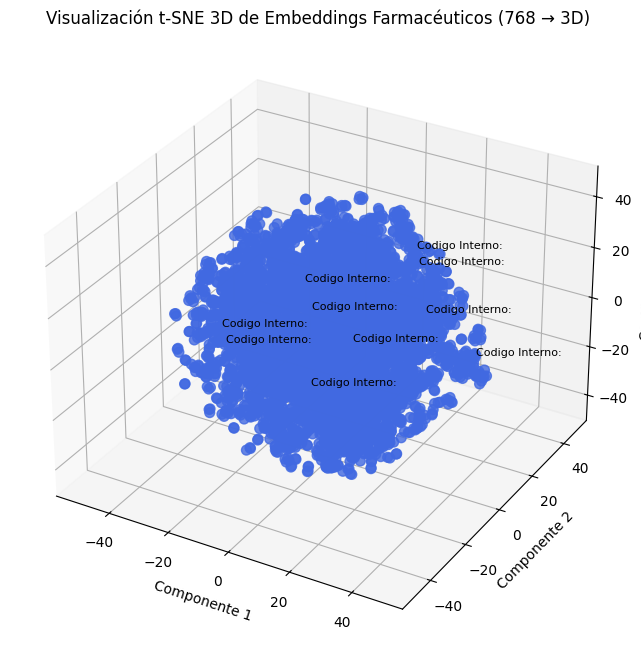

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # para gráficos 3D
import numpy as np

# Suponiendo que ya tienes tu clase Embedding instanciada
# y que ya ejecutaste emb.embedder(textos)
embeddings = np.array(embeddings)
labels = emb.text_store  # textos originales

# Reducción de 768 → 3 dimensiones
tsne = TSNE(
    n_components=3,       # 🔹 tres dimensiones
    perplexity=30,        # tamaño del vecindario
    learning_rate=200,    # tasa de aprendizaje
    n_iter=1000,          # número de iteraciones
    random_state=42
)

embeddings_3d = tsne.fit_transform(embeddings)


In [ ]:
import pandas as pd
import plotly.express as px

df_tsne = pd.DataFrame({
    "Componente 1": embeddings_3d[:, 0],
    "Componente 2": embeddings_3d[:, 1],
    "Componente 3": embeddings_3d[:, 2],
    "Texto": labels
})

# Gráfico 3D interactivo
fig = px.scatter_3d(
    df_tsne,
    x="Componente 1",
    y="Componente 2",
    z="Componente 3",
    hover_name="Texto",
    color="Componente 1",
    color_continuous_scale="Viridis",
    title="Visualización Interactiva t-SNE 3D de Embeddings Farmacéuticos (768 → 3D)"
)

# Personalización
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(
    scene=dict(
        xaxis_title='Componente 1',
        yaxis_title='Componente 2',
        zaxis_title='Componente 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

### 3. Reduccion de embeddings con PCA

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd
import numpy as np

# ====== 1️⃣ Aplicar PCA para reducir de 768 → 3 dimensiones ======
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# ====== 2️⃣ Crear un DataFrame con los resultados ======
df_pca = pd.DataFrame({
    "PC1": embeddings_3d[:, 0],
    "PC2": embeddings_3d[:, 1],
    "PC3": embeddings_3d[:, 2],
    "Texto": emb.text_store  # usa los textos originales de tu clase Embedding
})

# ====== 3️⃣ Visualización interactiva con Plotly Express ======
fig = px.scatter_3d(
    df_pca,
    x="PC1",
    y="PC2",
    z="PC3",
    hover_name="Texto",               # muestra el texto del medicamento al pasar el mouse
    color="PC1",                      # puedes cambiar por "PC2" o una categoría si la tienes
    color_continuous_scale="Viridis",
    title="Visualización Interactiva PCA 3D de Embeddings Farmacéuticos (768 → 3D)"
)

# ====== 4️⃣ Personalización del gráfico ======
fig.update_traces(
    marker=dict(size=6, opacity=0.9, line=dict(width=0.5, color="DarkSlateGrey"))
)

fig.update_layout(
    scene=dict(
        xaxis_title="Componente Principal 1",
        yaxis_title="Componente Principal 2",
        zaxis_title="Componente Principal 3",
        xaxis=dict(backgroundcolor="rgb(245,245,245)", gridcolor="white"),
        yaxis=dict(backgroundcolor="rgb(245,245,245)", gridcolor="white"),
        zaxis=dict(backgroundcolor="rgb(245,245,245)", gridcolor="white")
    ),
    height=700,
    margin=dict(l=0, r=0, b=0, t=40),
    template="plotly_white"
)

# ====== 5️⃣ Mostrar la figura ======
fig.show()
